In [1]:
import numpy as np
import pandas as pd
import sklearn
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 훈련 세트와 테스트 세트

- 지도학습 Supervied learning : 입력과 타깃이 모두 있음
- 비지도학습 Unsupervied learning : 입력만 있음 

- 훈련데이타 = 입력 + 타깃 

- 머신러닝 알고리즘의 평가를 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야한다. 
- 평가를 위한 또 다른 데이터를 준비하거나 이미 준비된 데이타중에서 일부를 떼어 내어 활용한다. 
- 테스트 세트 test set : 평가에 사용하는 데이타.
- 훈련 세트 traing set : 훈련에 사용되는 데이타.  

###  데이타수집 

- http://bit.ly/bream_smelt

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
len(fish_length), len(fish_weight)

(49, 49)

In [4]:
# zip함수를 통해서 묶기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14 # 1, 0으로 이루어진 Target 만들기

In [5]:
len(fish_data), len(fish_target)

(49, 49)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn

KNeighborsClassifier()

In [7]:
# 값을 기준으로 train과 test 나누기
X_train = fish_data[:35]
y_train = fish_target[:35]

X_test = fish_data[35:]
y_test = fish_target[35:]

##### 샘플링 편향(Sampling bias) 

훈련세트와 테스트 세트에 샘플이 골고루 섞여있지 않고 샘플링이 한쪽에 치워쳤다 

In [8]:
# 섞이지 않고 순서대로 train과 test를 나누었기 때문이다.
model_kn = model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

0.0

# 넘파이를 이용한 데이타셋 만들기

In [9]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
# random함수를 통해서 섞기 
np.random.seed(42) 
index = np.arange(49)
np.random.shuffle(index)

In [11]:
# 섞어진 index에 맞게 train과 test set 분리
X_train = input_arr[index[:35]]
y_train = target_arr[index[:35]]

X_test = input_arr[index[35:]]
y_test = target_arr[index[35:]]

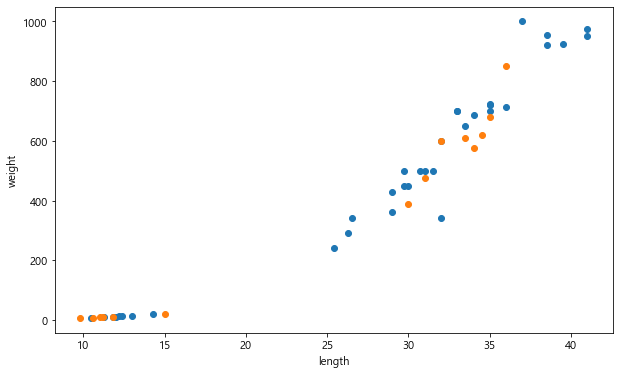

In [12]:
# 잘 혼합이 됬는지 확인
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 머신러닝 학습 및 평가

In [13]:
# 모델 학습하기
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [15]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [16]:
result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [17]:
# 에러률 
result = mean_squared_error(y_test, model_kn.predict(X_test))
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


In [18]:
model_kn.score(X_train, y_train)

1.0

In [19]:
model_kn.score(X_test, y_test)

1.0

In [20]:
# X_test를 예측하기
model_kn.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [21]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 학습 데이터와 테스트 데이터 세트 분리 메서드

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [24]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [25]:
X_train, X_test, y_train, y_test = train_test_split( np.array(fish_data), fish_target, test_size=0.2,
                                                    random_state=1)

In [26]:
len(X_train), len(X_test), len(y_train), len(y_test)

(39, 10, 39, 10)

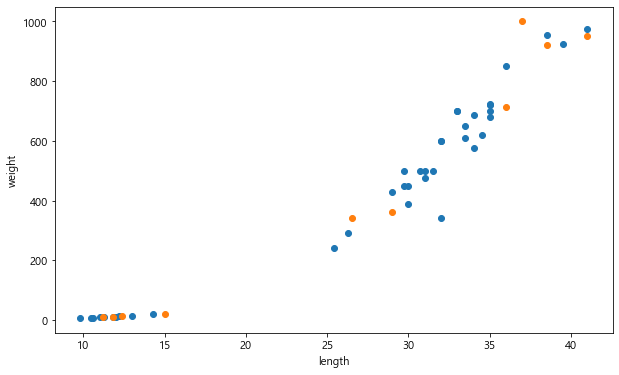

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# 예측 
model_kn.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [30]:
model_kn.score(X_train, y_train)

1.0

In [31]:
model_kn.score(X_test, y_test)

1.0

In [32]:
result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [33]:
# 에러률 
result = mean_squared_error(y_test, model_kn.predict(X_test))
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


# Quiz1 Penguin 

아래의 데이터는 펭귄의 날개 길이와 몸무게 그리고 그에 따른 펭귄의 종류이다.
펭귄의 날개 길이와 몸무게 => X
펭귄의 종류 => y

사이킷런에서 제공하는 분류기 알고리즘을 이용하여 머신러닝 모델을 생성하고 테스트하여라 

In [34]:
flipper_length = [181.0, 186.0, 195.0, 193.0, 190.0, 181.0, 195.0, 182.0, 191.0, 198.0, 185.0, 195.0, 197.0, 184.0, 194.0, 174.0, 180.0, 189.0, 185.0, 180.0, 187.0, 183.0, 187.0, 172.0, 180.0, 178.0, 178.0, 188.0, 184.0, 195.0, 196.0, 190.0, 180.0, 181.0, 184.0, 182.0, 195.0, 186.0, 196.0, 185.0, 190.0, 182.0, 190.0, 191.0, 186.0, 188.0, 190.0, 200.0, 187.0, 191.0, 186.0, 193.0, 181.0, 194.0, 185.0, 195.0, 185.0, 192.0, 184.0, 192.0, 195.0, 188.0, 190.0, 198.0, 190.0, 190.0, 196.0, 197.0, 190.0, 195.0, 191.0, 184.0, 187.0, 195.0, 189.0, 196.0, 187.0, 193.0, 191.0, 194.0, 190.0, 189.0, 189.0, 190.0, 202.0, 205.0, 185.0, 186.0, 187.0, 208.0, 190.0, 196.0, 178.0, 192.0, 192.0, 203.0, 183.0, 190.0, 193.0, 184.0, 199.0, 190.0, 181.0, 197.0, 198.0, 191.0, 193.0, 197.0, 191.0, 196.0, 188.0, 199.0, 189.0, 189.0, 187.0, 198.0, 176.0, 202.0, 186.0, 199.0, 191.0, 195.0, 191.0, 210.0, 190.0, 197.0, 193.0, 199.0, 187.0, 190.0, 191.0, 200.0, 185.0, 193.0, 193.0, 187.0, 188.0, 190.0, 192.0, 185.0, 190.0, 184.0, 195.0, 193.0, 187.0, 201.0, 211.0, 230.0, 210.0, 218.0, 215.0, 210.0, 211.0, 219.0, 209.0, 215.0, 214.0, 216.0, 214.0, 213.0, 210.0, 217.0, 210.0, 221.0, 209.0, 222.0, 218.0, 215.0, 213.0, 215.0, 215.0, 215.0, 215.0, 210.0, 220.0, 222.0, 209.0, 207.0, 230.0, 220.0, 220.0, 213.0, 219.0, 208.0, 208.0, 208.0, 225.0, 210.0, 216.0, 222.0, 217.0, 210.0, 225.0, 213.0, 215.0, 210.0, 220.0, 210.0, 225.0, 217.0, 220.0, 208.0, 220.0, 208.0, 224.0, 208.0, 221.0, 214.0, 231.0, 219.0, 230.0, 229.0, 220.0, 223.0, 216.0, 221.0, 221.0, 217.0, 216.0, 230.0, 209.0, 220.0, 215.0, 223.0, 212.0, 221.0, 212.0, 224.0, 212.0, 228.0, 218.0, 218.0, 212.0, 230.0, 218.0, 228.0, 212.0, 224.0, 214.0, 226.0, 216.0, 222.0, 203.0, 225.0, 219.0, 228.0, 215.0, 228.0, 215.0, 210.0, 219.0, 208.0, 209.0, 216.0, 229.0, 213.0, 230.0, 217.0, 230.0, 222.0, 214.0, 215.0, 222.0, 212.0, 213.0]

In [35]:
body_mass = [3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0, 4500.0, 5700.0, 4450.0, 5700.0, 5400.0, 4550.0, 4800.0, 5200.0, 4400.0, 5150.0, 4650.0, 5550.0, 4650.0, 5850.0, 4200.0, 5850.0, 4150.0, 6300.0, 4800.0, 5350.0, 5700.0, 5000.0, 4400.0, 5050.0, 5000.0, 5100.0, 5650.0, 4600.0, 5550.0, 5250.0, 4700.0, 5050.0, 6050.0, 5150.0, 5400.0, 4950.0, 5250.0, 4350.0, 5350.0, 3950.0, 5700.0, 4300.0, 4750.0, 5550.0, 4900.0, 4200.0, 5400.0, 5100.0, 5300.0, 4850.0, 5300.0, 4400.0, 5000.0, 4900.0, 5050.0, 4300.0, 5000.0, 4450.0, 5550.0, 4200.0, 5300.0, 4400.0, 5650.0, 4700.0, 5700.0, 5800.0, 4700.0, 5550.0, 4750.0, 5000.0, 5100.0, 5200.0, 4700.0, 5800.0, 4600.0, 6000.0, 4750.0, 5950.0, 4625.0, 5450.0, 4725.0, 5350.0, 4750.0, 5600.0, 4600.0, 5300.0, 4875.0, 5550.0, 4950.0, 5400.0, 4750.0, 5650.0, 4850.0, 5200.0, 4925.0, 4875.0, 4625.0, 5250.0, 4850.0, 5600.0, 4975.0, 5500.0, 5500.0, 4700.0, 5500.0, 4575.0, 5500.0, 5000.0, 5950.0, 4650.0, 5500.0, 4375.0, 5850.0, 6000.0, 4925.0, 4850.0, 5750.0, 5200.0, 5400.0]

In [36]:
species = ['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo']

In [37]:
# np.stack을 통해서 날개 길이와 몸무게 데이터를 묶어준다. 
penguins_data = np.hstack((np.array(flipper_length).reshape(-1,1), np.array(body_mass).reshape(-1,1)))
penguins_data.shape

(265, 2)

In [38]:
# train, test로 데이터 분할하기 testsize는 0.3의 비율로 한다.
X_train, X_test, y_train, y_test = train_test_split( penguins_data, species, random_state=1, stratify=species, test_size=0.3)

In [39]:
# 분할이 적절하게 완료됬는지 확인하기
X_train.shape, len(y_train)

((185, 2), 185)

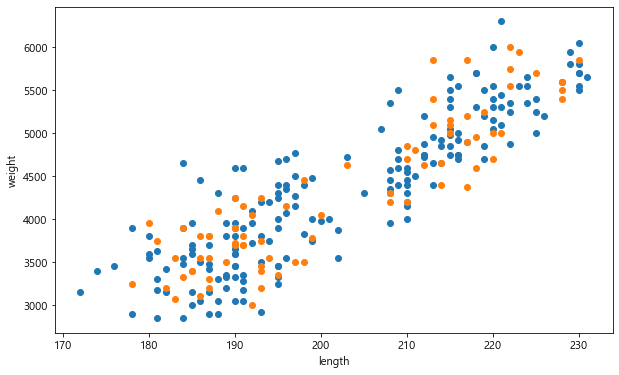

In [40]:
# 분할된 데이터에 대해서 그래프 그려보기
# 그래프를 통해서 train_test_split의 결과가 적절히 섞였다.
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_test[:,0], X_test[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
# 모델 적용하기 
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# X_test값과 y_test의 결과값 확인하기
model_kn.score(X_test, y_test)

0.9625

In [43]:
# X_train과 y_train 값 결과값 비교 
model_kn.score(X_train, y_train)

0.9459459459459459

## Penguins 시각화 해보기 

<AxesSubplot:xlabel='flipper_length', ylabel='body_mass'>

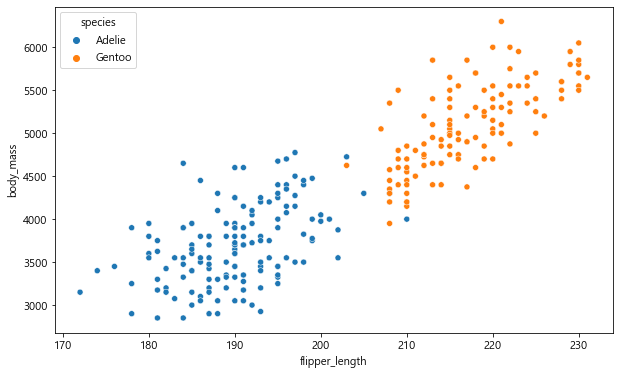

In [44]:
import pandas as pd

df_p = pd.DataFrame(penguins_data, columns=['flipper_length', 'body_mass'])
df_p['species'] = species
sns.scatterplot(x='flipper_length', y='body_mass', data=df_p, hue='species')

In [45]:
from sklearn.metrics import accuracy_score, mean_squared_error

result = accuracy_score(y_test, model_kn.predict(X_test))
print(f'정답률은? {result*100} %')

정답률은? 96.25 %


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

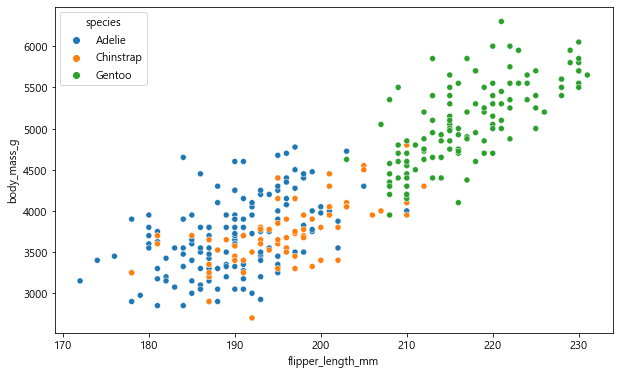

In [46]:
# seaborn을 통해서 시각화하기
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='species')